In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# 하이퍼파라미터
MY_EPOCH = 500
MY_BATCH = 64

In [ ]:
heading = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
           'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
           'LSTAT', 'MEDV']

In [ ]:
raw = pd.read_csv('./housing.csv')

In [ ]:
print('원본 데이터 샘플 10개')
print(raw.head(10))

print('원본 데이터 통계')
print(raw.describe())

원본 데이터 샘플 10개
      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33 

In [ ]:
scaler = StandardScaler()
Z_data = scaler.fit_transform(raw)

In [ ]:
Z_data = pd.DataFrame(Z_data,
                      columns=heading)

In [ ]:
# 정규화된 데이터 출력
print('정규화된 데이터 샘플 10개')
print(Z_data.head(10))

print('정규화된 데이터 통계')
print(Z_data.describe())

정규화 된 데이터 샘플 10개
       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   
5 -0.417044 -0.487722 -1.306878 -0.272599 -0.835284  0.207096 -0.351157   
6 -0.410243  0.048772 -0.476654 -0.272599 -0.265154 -0.388411 -0.070229   
7 -0.403696  0.048772 -0.476654 -0.272599 -0.265154 -0.160466  0.978808   
8 -0.395935  0.048772 -0.476654 -0.272599 -0.265154 -0.931206  1.117494   
9 -0.400729  0.048772 -0.476654 -0.272599 -0.265154 -0.399808  0.616090   

        DIS       RAD       TAX   PTRATIO     LSTAT      MEDV  
0  0.140214 -0.982843 -0.666608 -1.459000 -1.075562  0.159686  
1  0.557160 -0.867883 -0.9873

In [ ]:
# 데이터를 입력과 출력으로 분리
print('\n분리 전 데이터 모양: ', Z_data.shape)
X_data = Z_data.drop('MEDV', axis=1)
Y_data = Z_data['MEDV']


분리 전 데이터 모양:  (506, 13)


In [ ]:
# 데이터를 학습용과 평가용으로 분리
X_train, X_test, Y_train, Y_test = \
    train_test_split(X_data,
                     Y_data,
                     test_size=0.3)

print('\n학습용 입력 데이터 모양:', X_train.shape)
print('학습용 출력 데이터 모양:', Y_train.shape)
print('평가용 입력 데이터 모양:', X_test.shape)
print('평가용 출력 데이터 모양:', Y_test.shape)


학습용 입력 데이터 모양: (354, 12)
학습용 출력 데이터 모양: (354,)
평가용 입력 데이터 모양: (152, 12)
평가용 출력 데이터 모양: (152,)


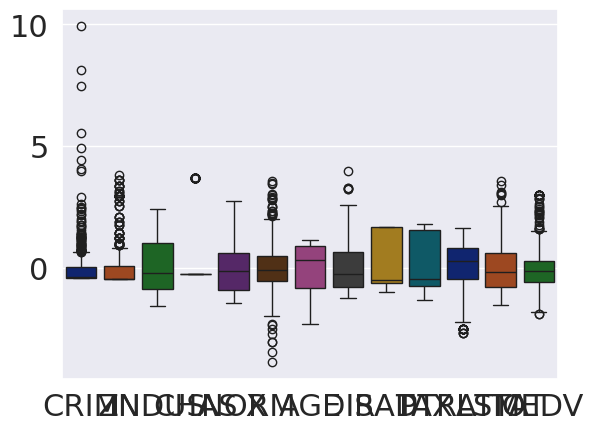

In [ ]:
# 상자그림 출력
sns.set(font_scale=2)
sns.boxplot(data=Z_data, palette='dark')
plt.show()

In [ ]:
##### 인공 신경망 구현 #####

# 케라스 DNN 구현
model = Sequential()
input = X_train.shape[1]
model.add(Dense(200,
                input_dim=input,
                activation='relu'))

model.add(Dense(1000,
                activation='relu'))

model.add(Dense(1))

print('\nDNN 요약')
model.summary()


DNN 요약
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               2600      
                                                                 
 dense_1 (Dense)             (None, 1000)              201000    
                                                                 
 dense_2 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 204601 (799.22 KB)
Trainable params: 204601 (799.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
##### 인공 신경망 학습 #####

# 최적화 함수와 손실 함수 지정
model.compile(optimizer='sgd',
              loss='mse')

print('\nDNN 학습 시작')
begin = time()

model.fit(X_train,
          Y_train,
          epochs=MY_EPOCH,
          batch_size=MY_BATCH,
          verbose=0)

end = time()
print('총 학습 시간: {:.1f}초'.format(end - begin))


DNN 학습 시작
총 학습 시간: 42.3초



DNN 평균 제곱 오차 (MSE): 0.17
5/5 [==============================] - 0s 3ms/step


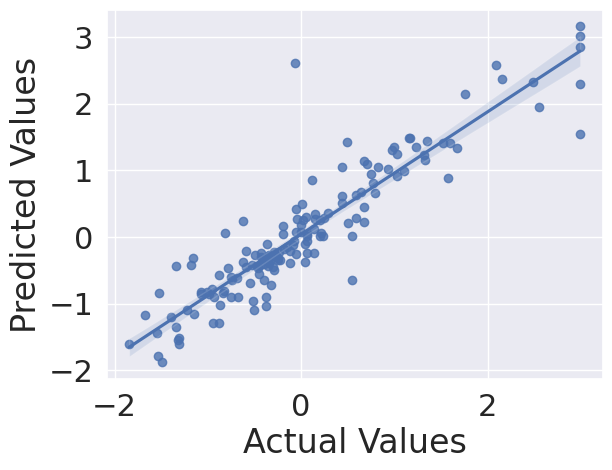

In [ ]:
##### 인공 신경망 평가 및 활용 #####

# 신경망 평가 및 손실값 계산
loss = model.evaluate(X_test,
                      Y_test,
                      verbose=0)

print('\nDNN 평균 제곱 오차 (MSE): {:.2f}'.format(loss))

# 신경망 활용 및 산포도 출력
pred = model.predict(X_test)
sns.regplot(x=Y_test, y=pred)

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()